In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

In [6]:
#stats = pd.read_csv("/home/anuroopa/Desktop/Data_analysis_projects/Pokemon/stats.csv", index_col = 0)
type_chart = pd.read_csv("/home/anuroopa/Desktop/Data_analysis_projects/Pokemon/Pokemon_Type_Chart.csv", index_col = 0)
details = pd.read_csv("../data_for_simulation.csv", index_col = 0)
results = pd.read_csv("../result.csv", index_col = 0)
details = details.merge(results)
details["total"] = details["attack"] + details["special_attack"] + details["speed"] + details["defense"] + details["special_defense"]
details = details.rename(columns={"len_win": "leg_win", "len_lose": "leg_lose"})
details.head()

,number,name,type1,type2,total,hp,attack,defense,special_attack,special_defense,speed,main_attack,category,win,lose,leg_win,leg_lose,myth_win,myth_lose,mega_win,mega_lose,norm_win,norm_lose
0,1,Bulbasaur,Grass,Poison,373.0,120.0,69.0,69.0,85.0,85.0,65.0,85.0,normal,298,921,5,81,2,27,1,51,290,742
1,2,Ivysaur,Grass,Poison,445.0,135.0,82.0,83.0,100.0,100.0,80.0,100.0,normal,480,739,7,79,6,23,3,49,460,572
2,3,Venusaur,Grass,Poison,545.0,155.0,102.0,103.0,120.0,120.0,100.0,120.0,normal,732,487,12,74,10,19,11,41,692,340
3,3,Mega Venusaur,Grass,Poison,645.0,155.0,120.0,143.0,142.0,140.0,100.0,142.0,mega_evolution,887,332,26,60,14,15,18,34,819,213
4,4,Charmander,Fire,Nil,370.0,114.0,72.0,63.0,80.0,70.0,85.0,80.0,normal,214,1005,1,85,1,28,1,51,211,821


In [10]:
details["win_pct"] = round(details["win"] / len(details) * 100, 2)
details["lose_pct"] = round(details["lose"] / len(details) * 100, 2)
details["position"] = details["win"].rank(method="first", ascending=False).astype(int)

In [8]:
details.sort_values(by="position").tail()

,number,name,type1,type2,total,hp,attack,defense,special_attack,special_defense,speed,main_attack,category,win,lose,leg_win,leg_lose,myth_win,myth_lose,mega_win,mega_lose,norm_win,norm_lose,win_pct,lose_pct,position
541,440,Happiny,Normal,Nil,220.0,175.0,25.0,25.0,35.0,85.0,50.0,35.0,normal,18,1201,0,86,0,29,0,52,18,1014,1.48,98.52,1215
989,824,Blipbug,Bug,Nil,255.0,100.0,40.0,40.0,45.0,65.0,65.0,45.0,normal,17,1202,1,85,0,29,0,52,16,1016,1.39,98.61,1216
247,191,Sunkern,Grass,Nil,250.0,105.0,50.0,50.0,50.0,50.0,50.0,50.0,normal,15,1204,0,86,0,29,0,52,15,1017,1.23,98.77,1217
906,746,Wishiwashi Solo Form,Water,Nil,230.0,120.0,40.0,40.0,45.0,45.0,60.0,45.0,normal,13,1206,0,86,0,29,0,52,13,1019,1.07,98.93,1218
429,349,Feebas,Water,Nil,280.0,95.0,35.0,40.0,30.0,75.0,100.0,35.0,normal,12,1207,0,86,0,29,0,52,12,1020,0.98,99.02,1219


In [9]:
# Blipbug wins against cosmog

In [6]:
details.describe()

,Base_Experience_Yield,height,weight,base_friendship,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,win_pct,lose_pct,position
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,151.089756,1.211317,66.977463,59.897561,4.741463,0.088780,70.072195,77.380488,72.395122,69.959024,70.088780,67.127805,427.023415,481.033171,543.966829,46.930065,53.069935,513.000000
std,79.022246,1.248299,121.277522,22.482942,2.633633,0.284565,26.665218,29.723557,29.364210,29.637133,26.668189,28.654567,112.779018,240.746079,240.746079,23.487422,23.487422,296.036315
min,36.000000,0.100000,0.100000,0.000000,1.000000,0.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,11.000000,54.000000,1.073171,5.268293,1.000000
25%,66.000000,0.500000,8.500000,50.000000,3.000000,0.000000,50.000000,55.000000,50.000000,47.000000,50.000000,45.000000,325.000000,266.000000,347.000000,25.951220,33.853659,257.000000
50%,158.000000,1.000000,28.000000,70.000000,5.000000,0.000000,67.000000,75.000000,70.000000,65.000000,65.000000,65.000000,450.000000,508.000000,517.000000,49.560976,50.439024,513.000000
75%,184.000000,1.500000,70.000000,70.000000,7.000000,0.000000,85.000000,100.000000,90.000000,90.000000,85.000000,88.000000,505.000000,678.000000,759.000000,66.146341,74.048780,769.000000
max,635.000000,20.000000,999.900000,140.000000,9.000000,1.000000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,720.000000,971.000000,1014.000000,94.731707,98.926829,1025.000000


In [7]:
details["type1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [8]:
def get_type_wise_result(details):
    types = ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
             'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
             'Dragon', 'Dark', 'Steel', 'Flying']

    result = []
    for i, type_ in enumerate(types):
        data = details[details["type"].str.contains(type_, case = False) == True]
        count = len(data)
        total = count * 1025
        wins = data["win"].sum()
        loses = data["lose"].sum()
        pct_wins = round(wins/total * 100, 2)
        pct_loses = round(loses/total * 100, 2)
        result.append({"type": type_, "number": count,"wins": wins, "loses": loses, 
                       "pct_wins": pct_wins, "pct_loses": pct_loses})
        
    return pd.DataFrame(result)

In [9]:
type_result = get_type_wise_result(details)
type_result = type_result.sort_values("pct_wins", ascending = False)
type_result.index = range(0, len(type_result))
type_result

,type,number,wins,loses,pct_wins,pct_loses
0,Dragon,70,45701,26049,63.69,36.31
1,Steel,65,41432,25193,62.19,37.81
2,Fighting,73,42811,32014,57.21,42.79
3,Dark,69,39591,31134,55.98,44.02
4,Ghost,65,36429,30196,54.68,45.32
5,Ice,48,26446,22754,53.75,46.25
6,Rock,74,39820,36030,52.50,47.50
7,Psychic,102,54472,50078,52.10,47.90
8,Electric,69,36759,33966,51.97,48.03
9,Ground,75,39792,37083,51.76,48.24


In [10]:
#details.nlargest(50, "win")

In [11]:
details["hp"].corr(details["win"])

np.float64(0.6565355642406496)

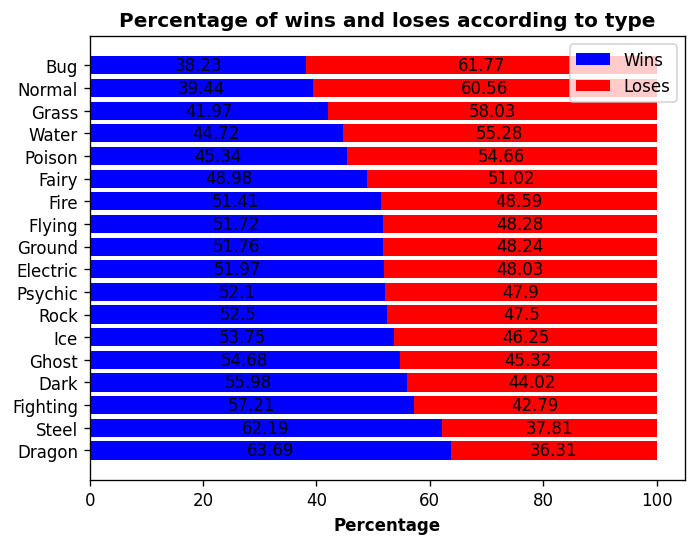

In [12]:
fig, ax = plt.subplots(dpi=120)
bars1 = ax.barh(type_result["type"], type_result["pct_wins"],
        color="b", label="Wins")
ax.bar_label(bars1, label_type="center", fontsize=10, color="black")
bars2 = ax.barh(type_result["type"], type_result["pct_loses"],
         left=type_result["pct_wins"], color="r", label="Loses")
ax.bar_label(bars2, label_type="center", fontsize=10, color="black")
plt.xlabel("Percentage", fontweight="bold")
plt.legend()
plt.title("Percentage of wins and loses according to type", fontweight = "bold")
plt.show()

In [7]:
top_100 = details.nlargest(100, "win")
type1 = top_100.groupby("type1")["name"].count()
type2 = top_100.groupby("type2")["name"].count()
#print(type1, type2)
print(type1 + type2)
# Flying 16, Bug 2, Nil 14

Bug          NaN
Dark        13.0
Dragon      27.0
Electric    10.0
Fairy       10.0
Fighting    12.0
Fire        10.0
Flying       NaN
Ghost       13.0
Grass        4.0
Ground      12.0
Ice          5.0
Nil          NaN
Normal       5.0
Poison       5.0
Psychic     15.0
Rock         4.0
Steel       15.0
Water        8.0
Name: name, dtype: float64


In [8]:
print((top_100["legendary"] == 1).sum())
print((details["legendary"] == "Yes").sum())
print((top_100["category"] == "Paradox Pokémon").sum())
print((top_100["ability"] == "Beast Boost").sum())

0
91
17
4


In [9]:
top_100.head()

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,type1,type2,win_pct,lose_pct,position
1007,#1008,Miraidon,Electric / Dragon,Hadron Engine,NaN,Gender unknown,50cycles,No Eggs Discovered,335.0,3.5,240.0,Slow,Purple,0.0,Paradox Pokémon,9,Yes,100.0,85.0,100.0,135.0,115.0,135.0,670.0,971,54,Electric,Dragon,94.73,5.27,1
643,644,Zekrom,Dragon / Electric,Teravolt,NaN,Gender unknown,120cycles,No Eggs Discovered,306.0,2.9,345.0,Slow,Black,0.0,Deep Black Pokémon,5,Yes,100.0,150.0,120.0,120.0,100.0,90.0,680.0,965,60,Dragon,Electric,94.15,5.85,2
791,792,Lunala,Psychic / Ghost,Shadow Shield,NaN,Gender unknown,120cycles,No Eggs Discovered,306.0,4.0,120.0,Slow,Purple,0.0,Moone Pokémon,7,Yes,137.0,113.0,89.0,137.0,107.0,97.0,680.0,965,60,Psychic,Ghost,94.15,5.85,3
486,487,Giratina,Ghost / Dragon,Pressure,Telepathy,Gender unknown,120cycles,No Eggs Discovered,306.0,4.5,750.0,Slow,Black,0.0,Renegade Pokémon,4,Yes,150.0,100.0,120.0,100.0,120.0,90.0,680.0,962,63,Ghost,Dragon,93.85,6.15,4
889,890,Eternatus,Poison / Dragon,Pressure,NaN,Gender unknown,120cycles,No Eggs Discovered,345.0,20.0,950.0,Slow,Purple,0.0,Gigantic Pokémon,8,Yes,140.0,85.0,95.0,145.0,95.0,130.0,690.0,959,66,Poison,Dragon,93.56,6.44,5


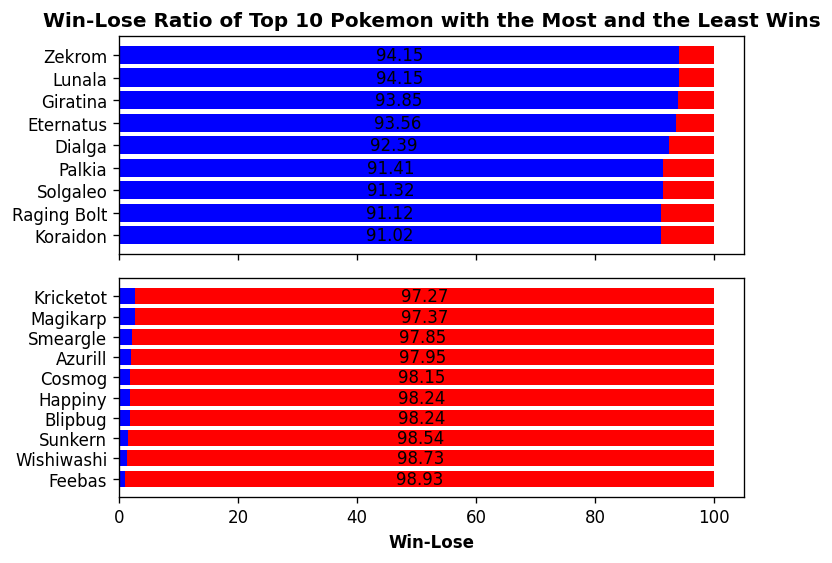

In [99]:
details_sorted = details.copy().sort_values("position", ascending=False)
fig, axes = plt.subplots(nrows=2, ncols=1, dpi = 120, sharex=True)
loc_ax = {axes[0]: (1, 11), axes[1]: (1015, 1026)}
for ax, i  in loc_ax.items():
    x = details_sorted.loc[(details_sorted["position"] > i[0]) & (details_sorted["position"] < i[1])]["name"]
    y = details_sorted.loc[(details_sorted["position"] > i[0]) & (details_sorted["position"] < i[1])]["win_pct"]
    z = details_sorted.loc[(details_sorted["position"] > i[0]) & (details_sorted["position"] < i[1])]["lose_pct"]
    bars1 = ax.barh(x, y, color="b")
    bars2 = ax.barh(x, z, left=y, color="red")
    if i == (1, 11):
        ax.bar_label(bars1, label_type="center", fontsize=10, color="black")
        ax.set_title("Win-Lose Ratio of Top 10 Pokemon with the Most and the Least Wins",
                    fontweight="bold")
    else:
        ax.bar_label(bars2, label_type="center", fontsize=10, color="black")
        ax.set_xlabel("Win-Lose", fontweight="bold")
plt.tight_layout()
plt.show()

In [6]:
details[(details["type"].str.contains("Steel / Dragon") == True) | 
    (details["type"].str.contains("Dragon / Steel") == True)]

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,type1,type2,win_pct,lose_pct,position
482,483,Dialga,Steel / Dragon,Pressure,Telepathy,Gender unknown,120cycles,No Eggs Discovered,306.0,5.4,683.0,Slow,White,0.0,Temporal Pokémon,4,Yes,100.0,120.0,120.0,150.0,100.0,90.0,680.0,947,78,Steel,Dragon,92.39,7.61,6
883,884,Duraludon,Steel / Dragon,Light Metal / Heavy Metal,Stalwart,"50% male, 50% female",30cycles,Mineral / Dragon,187.0,1.8,40.0,Medium Fast,White,50.0,Alloy Pokémon,8,No,70.0,95.0,115.0,120.0,50.0,85.0,535.0,763,262,Steel,Dragon,74.44,25.56,128
1017,#1018,Archaludon,Steel / Dragon,Stamina / Sturdy,Stalwart,"50% male, 50% female",30cycles,Mineral / Dragon,300.0,2.0,60.0,Medium Fast,White,50.0,Alloy Pokémon,9,No,90.0,105.0,130.0,125.0,65.0,85.0,600.0,850,175,Steel,Dragon,82.93,17.07,48


In [41]:
either = details.loc[details["is_special"] == "Yes"]

In [42]:
either.nlargest(111, "win").tail()

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,type1,type2,win_pct,lose_pct,position,is_special
1023,#1024,Terapagos,Normal,Tera Shift / Tera Shell,Teraform Zero,"50% male, 50% female",5cycles,No Eggs Discovered,90.0,0.2,6.5,Slow,Blue,50.0,Tera Pokémon,9,Yes,90.0,65.0,85.0,65.0,85.0,60.0,450.0,442,583,Normal,Nil,43.12,56.88,582,Yes
890,891,Kubfu,Fighting,Inner Focus,NaN,"87.5% male, 12.5% female",120cycles,No Eggs Discovered,77.0,0.6,12.0,Slow,Gray,50.0,Wushu Pokémon,8,Yes,60.0,90.0,60.0,53.0,50.0,72.0,385.0,384,641,Fighting,Nil,37.46,62.54,652,Yes
789,790,Cosmoem,Psychic,Sturdy,NaN,Gender unknown,120cycles,No Eggs Discovered,140.0,0.1,999.9,Slow,Blue,0.0,Protostar Pokémon,7,Yes,43.0,29.0,131.0,29.0,131.0,37.0,400.0,237,788,Psychic,Nil,23.12,76.88,797,Yes
807,808,Meltan,Steel,Magnet Pull,NaN,Gender unknown,120cycles,No Eggs Discovered,135.0,0.2,8.0,Slow,Gray,0.0,Hex Nut Pokémon,7,Yes,46.0,65.0,65.0,55.0,35.0,34.0,300.0,167,858,Steel,Nil,16.29,83.71,904,Yes
788,789,Cosmog,Psychic,Unaware,NaN,Gender unknown,120cycles,No Eggs Discovered,40.0,0.2,0.1,Slow,Blue,0.0,Nebula Pokémon,7,Yes,43.0,29.0,31.0,29.0,31.0,37.0,200.0,19,1006,Psychic,Nil,1.85,98.15,1020,Yes


In [100]:
dark = details.loc[details["type"].str.contains("Dark")]
dark = dark.sort_values("position", ascending=False)
dark.head()

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,type1,type2,win_pct,lose_pct,position,is_special
260,261,Poochyena,Dark,Run Away / Quick Feet,Rattled,"50% male, 50% female",15cycles,Field,56.0,0.5,13.6,Medium Fast,Gray,70.0,Bite Pokémon,3,No,35.0,55.0,35.0,30.0,30.0,35.0,220.0,47,978,Dark,Nil,4.59,95.41,1002,No
826,827,Nickit,Dark,Run Away / Unburden,Stakeout,"50% male, 50% female",15cycles,Field,49.0,0.6,8.9,Fast,Brown,50.0,Fox Pokémon,8,No,40.0,28.0,28.0,47.0,52.0,50.0,245.0,67,958,Dark,Nil,6.54,93.46,992,No
508,509,Purrloin,Dark,Limber / Unburden,Prankster,"50% male, 50% female",20cycles,Field,56.0,0.4,10.1,Medium Fast,Purple,70.0,Devious Pokémon,5,No,41.0,50.0,37.0,50.0,37.0,66.0,281.0,101,924,Dark,Nil,9.85,90.15,969,No
858,859,Impidimp,Dark / Fairy,Prankster / Frisk,Pickpocket,100% male,20cycles,Fairy / Human-Like,53.0,0.4,5.5,Medium Fast,Pink,50.0,Wily Pokémon,8,No,45.0,45.0,30.0,55.0,40.0,50.0,265.0,128,897,Dark,Fairy,12.49,87.51,951,No
317,318,Carvanha,Water / Dark,Rough Skin,Speed Boost,"50% male, 50% female",20cycles,Water 2,61.0,0.8,20.8,Slow,Red,35.0,Savage Pokémon,3,No,45.0,90.0,20.0,65.0,20.0,65.0,305.0,183,842,Water,Dark,17.85,82.15,881,No


In [45]:
print(len(dark[dark["is_special"] == "Yes"]["name"]))
dark[dark["is_special"] == "Yes"]["name"]

11


716          Yveltal
992     Iron Jugulis
1002         Ting-Lu
1004    Roaring Moon
891          Urshifu
892           Zarude
490          Darkrai
1003          Chi-Yu
1001       Chien-Pao
985     Brute Bonnet
1000        Wo-Chien
Name: name, dtype: object

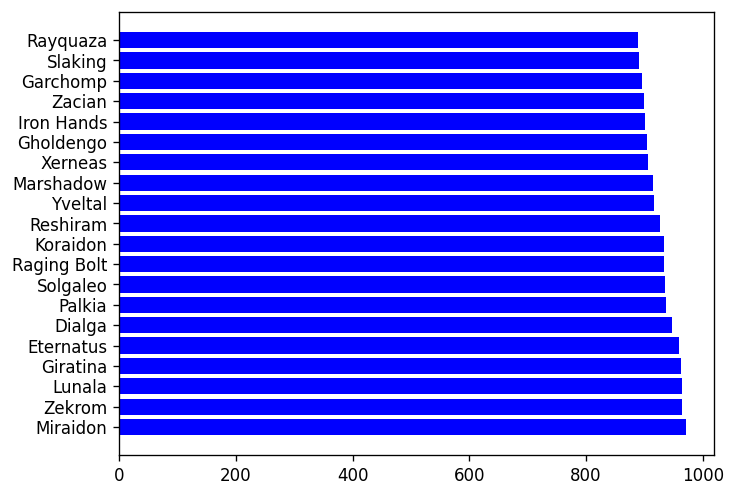

In [16]:
plt.figure(dpi = 120)
top_20_wins = details.nlargest(20, "win")
plt.barh(top_20_wins["name"], top_20_wins["win"], color = "b")
plt.show()

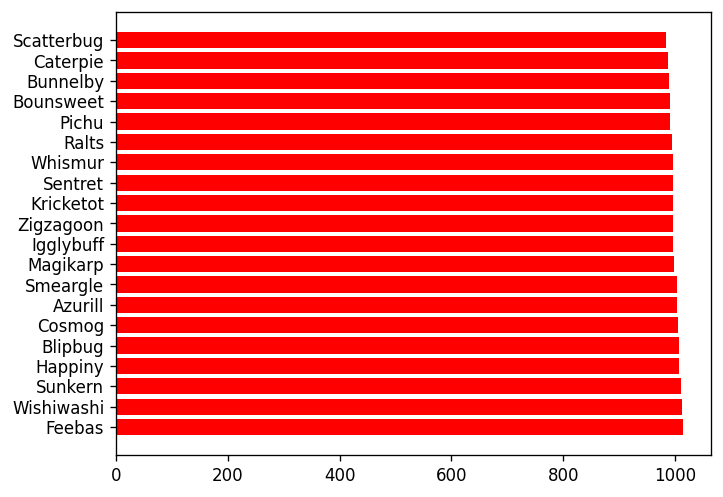

In [17]:
plt.figure(dpi = 120)
top_20_loses = details.nlargest(20, "lose")
plt.barh(top_20_loses["name"], top_20_loses["lose"], color = "r")
plt.show()

In [18]:
details[details["type"].str.contains("Fire") == True]["win"].sum()

np.int64(42685)

In [19]:
print(len(details[details["win"] < 512]))
print(len(details[details["win"] >= 512]))

519
506


In [98]:
needs = ['Base_Experience_Yield', 'height', 'weight',
        'base_friendship', 'gen',
        'hp', 'attack', 'defense', 'special_attack',
       'special_defense', 'speed', 'total', 'win', 'lose']

In [22]:
details[needs].corr()

,Base_Experience_Yield,height,weight,base_friendship,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose
Base_Experience_Yield,1.000000,0.476226,0.433907,-0.335197,0.170967,NaN,0.683652,0.620316,0.549325,0.643602,0.654099,0.513936,0.922539,0.878002,-0.878002
height,0.476226,1.000000,0.632504,-0.313313,0.052696,NaN,0.483217,0.384335,0.348725,0.319507,0.276189,0.201393,0.506783,0.488658,-0.488658
weight,0.433907,0.632504,1.000000,-0.383344,0.111277,NaN,0.476355,0.402339,0.447561,0.185233,0.265010,0.043313,0.457546,0.449167,-0.449167
base_friendship,-0.335197,-0.313313,-0.383344,1.000000,-0.407735,NaN,-0.174503,-0.307630,-0.228202,-0.243125,-0.163128,-0.230114,-0.342685,-0.328635,0.328635
gen,0.170967,0.052696,0.111277,-0.407735,1.000000,NaN,0.121887,0.146967,0.099932,0.086569,0.065650,0.079556,0.152059,0.189949,-0.189949
legendary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hp,0.683652,0.483217,0.476355,-0.174503,0.121887,NaN,1.000000,0.480018,0.299119,0.356717,0.365108,0.179567,0.666531,0.656536,-0.656536
attack,0.620316,0.384335,0.402339,-0.307630,0.146967,NaN,0.480018,1.000000,0.466646,0.286626,0.226016,0.353644,0.717170,0.725370,-0.725370
defense,0.549325,0.348725,0.447561,-0.228202,0.099932,NaN,0.299119,0.466646,1.000000,0.208710,0.501515,0.007538,0.629432,0.642333,-0.642333
special_attack,0.643602,0.319507,0.185233,-0.243125,0.086569,NaN,0.356717,0.286626,0.208710,1.000000,0.492095,0.423616,0.701008,0.652264,-0.652264


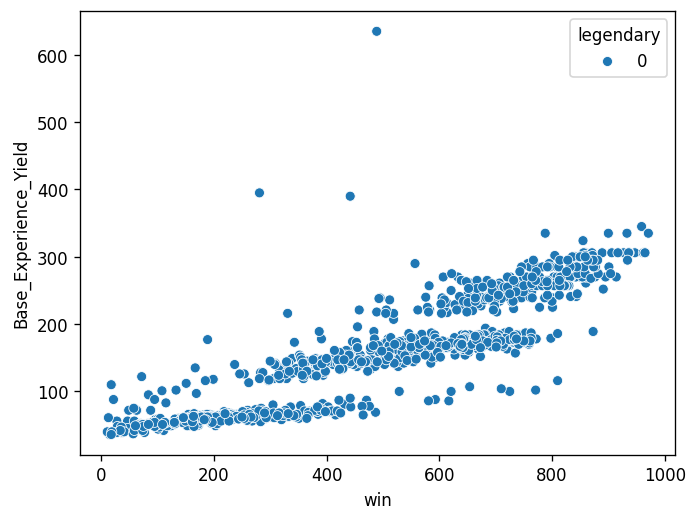

In [23]:
plt.figure(dpi = 120)
sns.scatterplot(y = details["Base_Experience_Yield"], x = details["win"],
               hue = details["legendary"])
plt.show()

0.9565084580408967


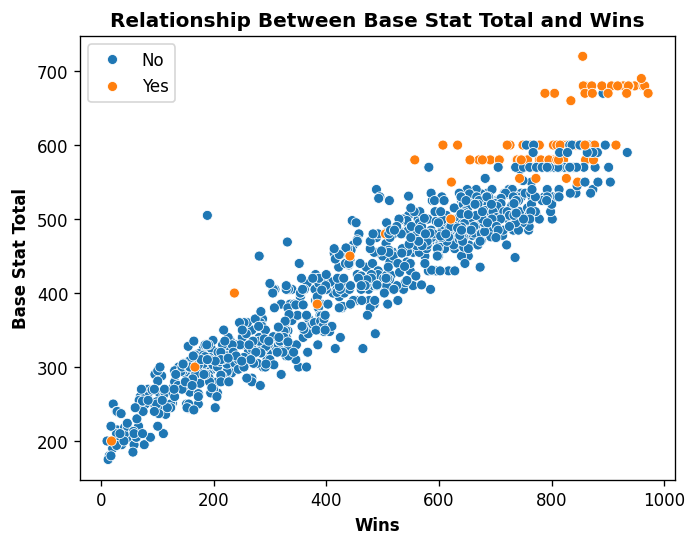

In [31]:
plt.figure(dpi = 120)
ax = sns.scatterplot(y = details["total"], x = details["win"],
               hue = details["legendary"])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["No", "Yes"])
plt.xlabel("Wins", fontweight = "bold")
plt.ylabel("Base Stat Total", fontweight = "bold")
plt.title("Relationship Between Base Stat Total and Wins", fontweight = "bold")
print(details["total"].corr(details["win"]))
plt.savefig("graphs/base_stats_win.png")
plt.show()

In [ ]:
plt.figure(dpi = 120)
ax = sns.scatterplot(y = details["total"], x = details["lose"],
               hue = details["legendary"])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["No", "Yes"])
plt.xlabel("Loses", fontweight = "bold")
plt.ylabel("Base Stat Total", fontweight = "bold")
plt.title("Relationship Between Base Stat Total and Loses", fontweight = "bold")
print(details["total"].corr(details["lose"]))
plt.show()

In [106]:
legendary = details[details["legendary"] == "Yes"].nlargest(91, "win")

In [107]:
ultra_beast = details[details["ability"].str.contains("Beast Boost") == True].nlargest(11, "win")
print(len(ultra_beast))

11


In [33]:
paradox = details[details["category"].str.contains("Paradox Pokémon") == True].nlargest(22, "win")
print(len(paradox))

22


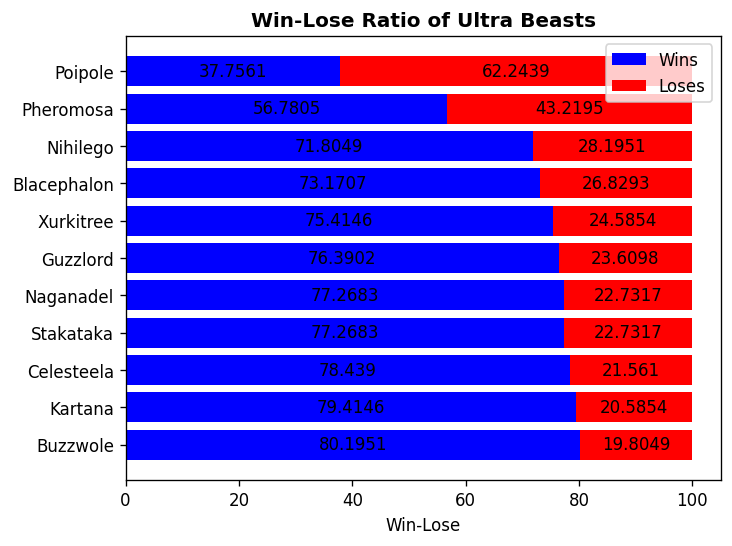

In [109]:
fig, ax = plt.subplots(dpi = 120)
bars1 = ax.barh(ultra_beast["name"], ultra_beast["win_pct"], color="b",
        label="Wins")
ax.bar_label(bars1, label_type="center", fontsize=10, color="black")
bars2 = ax.barh(ultra_beast["name"], ultra_beast["lose_pct"], color="r", left = ultra_beast["win_pct"],
        label="Loses")
ax.bar_label(bars2, label_type="center", fontsize=10, color="black")
plt.title("Win-Lose Ratio of Ultra Beasts", fontweight = "bold")
plt.xlabel("Win-Lose")
plt.legend()
plt.show()

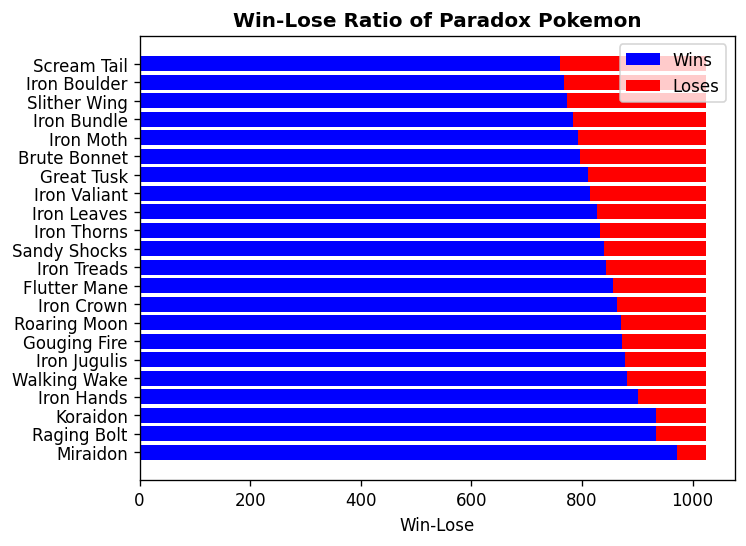

In [35]:
plt.figure(dpi = 120)
plt.barh(paradox["name"], paradox["win"], color="b",
        label="Wins")
plt.barh(paradox["name"], paradox["lose"], color="r", left = paradox["win"],
        label="Loses")
plt.title("Win-Lose Ratio of Paradox Pokemon", fontweight = "bold")
plt.xlabel("Win-Lose")
plt.legend()
plt.show()

In [68]:
starters = ["Bulbasaur","Charmander","Squirtle","Chikorita",
            "Cyndaquil","Totodile","Treecko","Torchic","Mudkip",
            "Turtwig","Chimchar","Piplup","Snivy","Tepig","Oshawott",
            "Chespin","Fennekin", "Froakie","Rowlet","Litten",
            "Popplio", "Grookey","Scorbunny","Sobble",
            "Sprigatito","Fuecoco", "Quaxly"]

In [69]:
def get_starter_data(starters, details):
    for i, name in enumerate(starters):
        if ((details["name"].str.contains(name)).sum() == 1) & (i < 1):
            num = int(details[details["name"] == name]["number"].iloc[0]) - 1
            data = details.loc[[num, num+1, num+2], :]
            starter_data = data
        elif ((details["name"].str.contains(name)).sum() == 1) & (i >= 1):
            num = int(details[details["name"] == name]["number"].iloc[0]) - 1
            data = details.loc[[num, num+1, num+2], :]
            starter_data = pd.concat([starter_data, data])
    return starter_data

In [70]:
starter_data = get_starter_data(starters, details)

In [71]:
starter_data.index = range(0, len(starter_data))
starter_data["win_pct"] = round(starter_data["win"]/1025 * 100, 2)
starter_data["stage"] = (starter_data.index % 3) + 1
starter_data["pos_within"] = starter_data["win"].rank(method="first", ascending=False).astype(int)
# starter_data.loc[np.array(starter_data.index)[np.arange(0,81,3)], "stage"] = 1
# starter_data.loc[np.array(starter_data.index)[np.arange(1,81,3)], "stage"] = 2
# starter_data.loc[np.array(starter_data.index)[np.arange(2,81,3)], "stage"] = 3
#(starter_final.nlargest(27, "win")[["name", "win"]])

In [72]:
stage_3 = starter_data[starter_data["stage"] == 3]
stage_2 = starter_data[starter_data["stage"] == 2]
stage_1 = starter_data[starter_data["stage"] == 1]

In [73]:
stage_3.sort_values("position", ascending = True).head()

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,type1,type2,win_pct,lose_pct,position,is_special,stage,pos_within
77,911,Skeledirge,Fire / Ghost,Blaze,Unaware,"87.5% male, 12.5% female",20cycles,Field,265.0,1.6,326.5,Medium Slow,Red,50.0,Singer Pokémon,9,No,104.0,75.0,100.0,110.0,75.0,66.0,530.0,813,212,Fire,Ghost,79.32,20.68,79,No,3,1
62,730,Primarina,Water / Fairy,Torrent,Liquid Voice,"87.5% male, 12.5% female",15cycles,Water 1 / Field,239.0,1.8,44.0,Medium Slow,Blue,70.0,Soloist Pokémon,7,No,80.0,74.0,74.0,126.0,116.0,60.0,530.0,787,238,Water,Fairy,76.78,23.22,106,No,3,2
59,727,Incineroar,Fire / Dark,Blaze,Intimidate,"87.5% male, 12.5% female",15cycles,Field,239.0,1.8,83.0,Medium Slow,Red,70.0,Heel Pokémon,7,No,95.0,115.0,90.0,80.0,90.0,60.0,530.0,765,260,Fire,Dark,74.63,25.37,124,No,3,3
50,655,Delphox,Fire / Psychic,Blaze,Magician,"87.5% male, 12.5% female",20cycles,Field,240.0,1.5,39.0,Medium Slow,Red,70.0,Fox Pokémon,6,No,75.0,69.0,72.0,114.0,100.0,104.0,534.0,761,264,Fire,Psychic,74.24,25.76,132,No,3,4
26,260,Swampert,Water / Ground,Torrent,Damp,"87.5% male, 12.5% female",20cycles,Monster / Water 1,241.0,1.5,81.9,Medium Slow,Blue,70.0,Mud Fish Pokémon,3,No,100.0,110.0,90.0,85.0,90.0,60.0,535.0,746,279,Water,Ground,72.78,27.22,149,No,3,5


In [74]:
stage_2.sort_values("position", ascending=False).head()

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,type1,type2,win_pct,lose_pct,position,is_special,stage,pos_within
37,496,Servine,Grass,Overgrow,Contrary,"87.5% male, 12.5% female",20cycles,Field / Grass,145.0,0.8,16.0,Medium Slow,Green,70.0,Grass Snake Pokémon,5,No,60.0,60.0,75.0,60.0,75.0,83.0,413.0,300,725,Grass,Nil,29.27,70.73,728,No,2,55
19,253,Grovyle,Grass,Overgrow,Unburden,"87.5% male, 12.5% female",20cycles,Monster / Dragon,142.0,0.9,21.6,Medium Slow,Green,70.0,Wood Gecko Pokémon,3,No,50.0,65.0,45.0,85.0,65.0,95.0,405.0,306,719,Grass,Nil,29.85,70.15,724,No,2,54
10,153,Bayleef,Grass,Overgrow,Leaf Guard,"87.5% male, 12.5% female",20cycles,Monster / Grass,142.0,1.2,15.8,Medium Slow,Green,70.0,Leaf Pokémon,2,No,60.0,62.0,80.0,63.0,80.0,60.0,405.0,309,716,Grass,Nil,30.15,69.85,721,No,2,53
73,907,Floragato,Grass,Overgrow,Protean,"87.5% male, 12.5% female",20cycles,Field / Grass,144.0,0.9,12.2,Medium Slow,Green,50.0,Grass Cat Pokémon,9,No,61.0,80.0,63.0,60.0,63.0,83.0,410.0,329,696,Grass,Nil,32.10,67.90,702,No,2,51
7,008,Wartortle,Water,Torrent,Rain Dish,"87.5% male, 12.5% female",20cycles,Monster / Water 1,142.0,1.0,22.5,Medium Slow,Blue,70.0,Turtle Pokémon,1,No,59.0,63.0,80.0,65.0,80.0,58.0,405.0,334,691,Water,Nil,32.59,67.41,690,No,2,50


In [75]:
stage_1.sort_values("position", ascending=False).head()

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen,legendary,hp,attack,defense,special_attack,special_defense,speed,total,win,lose,type1,type2,win_pct,lose_pct,position,is_special,stage,pos_within
36,495,Snivy,Grass,Overgrow,Contrary,"87.5% male, 12.5% female",20cycles,Field / Grass,62.0,0.6,8.1,Medium Slow,Green,70.0,Grass Snake Pokémon,5,No,45.0,45.0,55.0,45.0,55.0,63.0,308.0,157,868,Grass,Nil,15.32,84.68,918,No,1,81
6,007,Squirtle,Water,Torrent,Rain Dish,"87.5% male, 12.5% female",20cycles,Monster / Water 1,63.0,0.5,9.0,Medium Slow,Blue,70.0,Tiny Turtle Pokémon,1,No,44.0,48.0,65.0,50.0,64.0,43.0,314.0,173,852,Water,Nil,16.88,83.12,891,No,1,80
9,152,Chikorita,Grass,Overgrow,Leaf Guard,"87.5% male, 12.5% female",20cycles,Monster / Grass,64.0,0.9,6.4,Medium Slow,Green,70.0,Leaf Pokémon,2,No,45.0,49.0,65.0,49.0,65.0,45.0,318.0,174,851,Grass,Nil,16.98,83.02,890,No,1,79
18,252,Treecko,Grass,Overgrow,Unburden,"87.5% male, 12.5% female",20cycles,Monster / Dragon,62.0,0.5,5.0,Medium Slow,Green,70.0,Wood Gecko Pokémon,3,No,40.0,45.0,35.0,65.0,55.0,70.0,310.0,175,850,Grass,Nil,17.07,82.93,889,No,1,78
72,906,Sprigatito,Grass,Overgrow,Protean,"87.5% male, 12.5% female",20cycles,Field / Grass,62.0,0.4,4.1,Medium Slow,Green,50.0,Grass Cat Pokémon,9,No,40.0,61.0,54.0,45.0,45.0,65.0,310.0,178,847,Grass,Nil,17.37,82.63,887,No,1,77


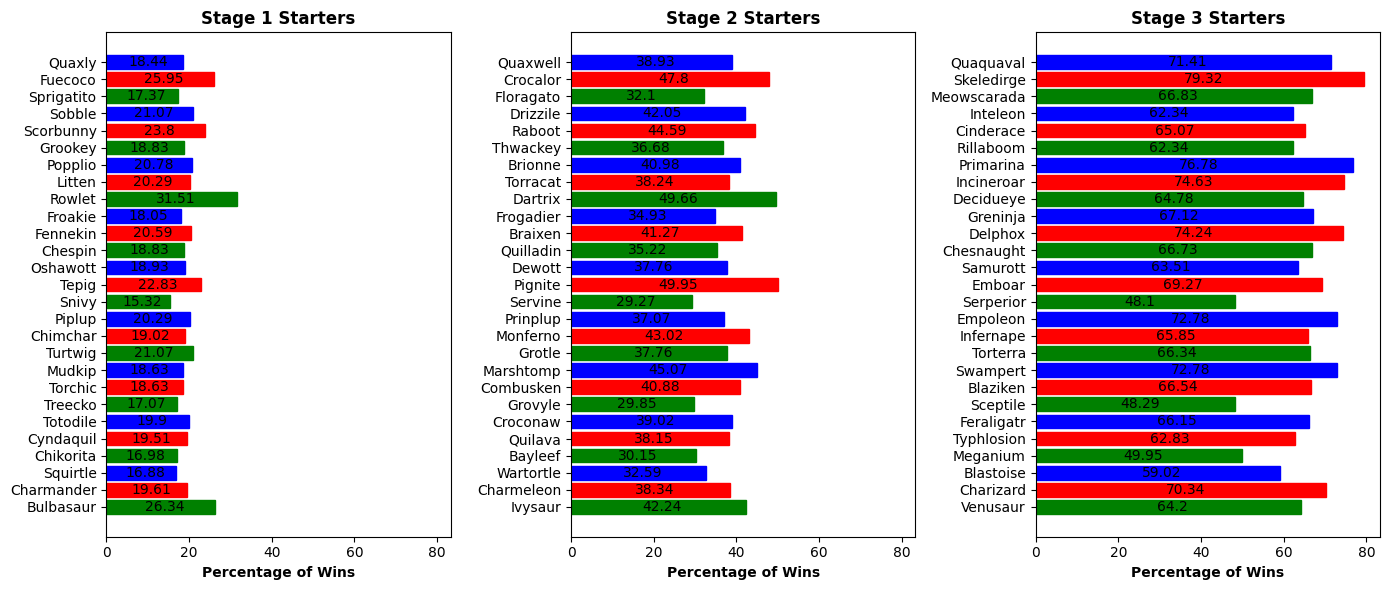

In [76]:
bar_colors = ["green", "red", "blue"]
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True,
                                   figsize = (14,6))

for stage, ax in enumerate(axes, start=1):
    x = starter_data[starter_data["stage"] == stage]["name"]
    y = starter_data[starter_data["stage"] == stage]["win_pct"]
    #z = starter_data[starter_data["stage"] == stage]["lose"]
    bars = ax.barh(x, y, color = "blue")
    for i, bar in enumerate(bars):
        bar.set_color(bar_colors[i % 3])
    #ax1.barh(x, z, left = y, color = "red")
    ax.bar_label(bars, color="black", label_type="center", padding=3, fontsize=10)
    ax.set_xlabel("Percentage of Wins", fontweight = "bold")
    ax.set_title(f"Stage {stage} Starters", fontweight = "bold")

plt.tight_layout()
fig.savefig("/home/anuroopa/Desktop/Data_analysis_projects/Pokemon/graphs/starters_win.png")
plt.show()


In [58]:
def get_result_gen_wise(details):
    result = []
    for i in range(1, 10):
        data = details.loc[details["gen"] == i]
        count = len(data)
        total = count * 1025
        wins = data["win"].sum()
        loses = data["lose"].sum()
        win_pct = round(wins/total * 100, 2)
        lose_pct = round(loses/total * 100, 2)
        result.append({"gen": i, "count": count, "wins": wins, "loses": loses,
                     "win_pct": win_pct, "lose_pct": lose_pct})
    return pd.DataFrame(result)

In [59]:
gen_result = get_result_gen_wise(details)
gen_result

,gen,count,wins,loses,win_pct,lose_pct
0,1,151,65428,89347,42.27,57.73
1,2,100,42989,59511,41.94,58.06
2,3,135,55039,83336,39.78,60.22
3,4,107,54371,55304,49.57,50.43
4,5,156,75079,84821,46.95,53.05
5,6,72,35174,38626,47.66,52.34
6,7,88,47389,42811,52.54,47.46
7,8,96,49333,49067,50.14,49.86
8,9,120,68257,54743,55.49,44.51


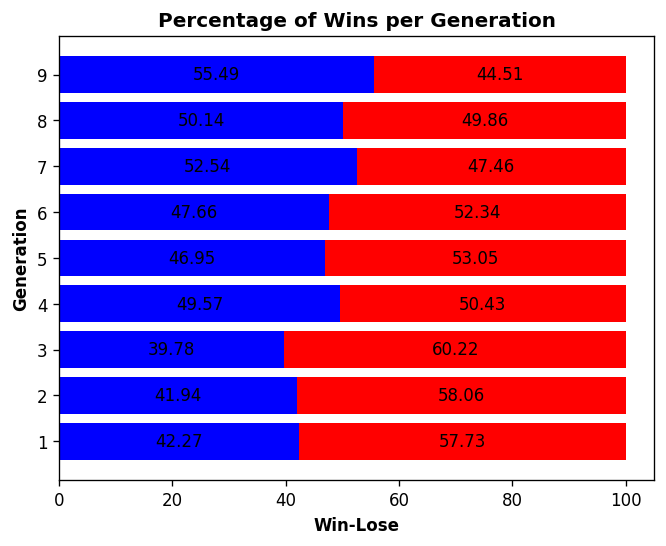

In [64]:
fig, ax = plt.subplots(dpi = 120)
x = gen_result["gen"]
y = gen_result["win_pct"]
z = gen_result["lose_pct"]
bars1 = ax.barh(x, y, color="b")
bars2 = ax.barh(x, z, left=y, color="r")
ax.bar_label(bars1, label_type="center", fontsize=10, color="black")
ax.bar_label(bars2, label_type="center", fontsize=10, color="black")
ax.set_yticks(np.arange(1,10))
ax.set_title("Percentage of Wins per Generation", fontweight="bold")
ax.set_ylabel("Generation", fontweight="bold")
ax.set_xlabel("Win-Lose", fontweight="bold")
plt.show()